<a href="https://colab.research.google.com/github/debajyoti-iitm/Basic-and-Machine-Learning-Programs-In-Python/blob/main/ML_Project_Analysis_of_Indian_political_scenario_from_Google_search_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
# Comparing Popularity of 4 Indian Political Leaders:A Project Using Python and Google Search Trends
**Debajyoti Biswas**

Department of Electrical Engineering

Indian Institute of Technology Madras

Chennai-600036

Email: debajyotibiswas253@gmail.com
# Introduction
[Google Trends](https://https://trends.google.com/trends/?geo=IN) is a website by Google that analyzes the popularity of top search queries in Google Search across various regions and languages. The website uses graphs to compare the search volume of different queries over time. \\
In this short project we compare 4 items, names of 4 Indian political leaders to compare who has the maximum number of google searches on his / her name across different states of India and the variation of the search trends with progress of time. The application of this project can be manifold, we can define business or marketing strategies of different products based on past time series analysis or geographical analysis, customized marketing campaigns of products in different geo-political regions etc.
# Python code
For accessing the Google trends data with [Python](https://https://www.python.org/), the API(An application programming interface (API) is a connection between computers or between computer programs.) called [Pytrends](https://https://pypi.org/project/pytrends/) is imported. Pytrends allows simple interface for automating downloading of reports from Google Trends.

In [ ]:
pip install pytrends #here we install pytrends API
#Following is the output

In [ ]:
import pandas as pd #importing pandas for preparing dataframe
from pytrends.request import TrendReq #connecting to google trends and requesting for data
import matplotlib.pyplot as plt #importing matplotlib for plotting the data
trends = TrendReq()
#Build Payload part. More about this on https://pypi.org/project/pytrends/
trends.build_payload(kw_list=['Narendra Modi', 'Mamata Banerjee', 'Arvind Kejriwal','Rahul Gandhi'],cat=0, timeframe='2021-01-01 2021-07-20', geo='IN', gprop='')
data = trends.interest_by_region() #trends by geographical regions
data = data.sort_values(by="Narendra Modi", ascending=False) #sorting according to a random item. According to any other item it can be sorted as well
data = data.head(50)#we show first 50 line of the dataset
print(data) #and print the data

                             Narendra Modi  ...  Rahul Gandhi
geoName                                     ...              
Gujarat                                 71  ...            16
Daman and Diu                           70  ...            15
Andaman and Nicobar Islands             64  ...             9
Mizoram                                 63  ...             0
Madhya Pradesh                          62  ...            25
Bihar                                   61  ...            19
Nagaland                                58  ...            17
Maharashtra                             58  ...            24
Chhattisgarh                            58  ...            26
Arunachal Pradesh                       58  ...            21
Rajasthan                               57  ...            27
Jammu and Kashmir                       56  ...            21
Assam                                   56  ...            17
Uttarakhand                             55  ...            31
Jharkhan

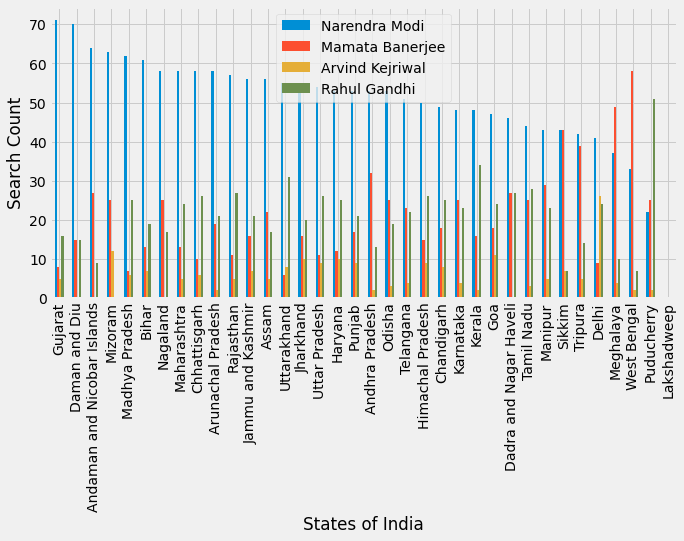

In [ ]:

data.reset_index().plot(x="geoName", y=['Narendra Modi', 'Mamata Banerjee', 'Arvind Kejriwal','Rahul Gandhi'], figsize=(10,5), kind="bar")
#Interest by subregion
#See in which location your term was most popular during the specified time frame. Values are calculated on a scale from 0 to 100, 
#where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates
# a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term.
#A higher value means a higher proportion of all queries, not a higher absolute query count. So a tiny country where 80% of the queries 
#are for "bananas" will get twice the score of a giant country where only 40% of the queries are for "bananas".
plt.style.use('fivethirtyeight')
plt.xlabel('States of India') #x axis label
plt.ylabel('Search Count') #y axis label
plt.legend(loc='upper center',fontsize=14) #adding legends
plt.show() #here comes the plot


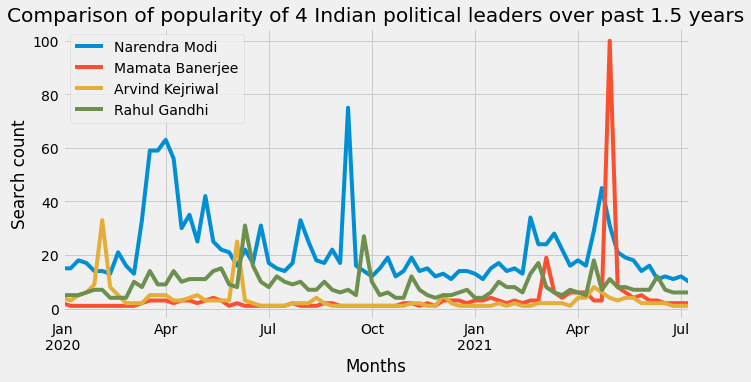

In [ ]:
data = TrendReq(hl='en-US', tz=360)
data.build_payload(kw_list=['Narendra Modi', 'Mamata Banerjee', 'Arvind Kejriwal','Rahul Gandhi'],cat=0, timeframe='2020-01-01 2021-09-19', geo='IN', gprop='')
#For the google search on 'Narendra Modi', there are 2 peaks at around March, April 2020 and on 17th September 2020.
#For the keyword 'Mamata Banerjee', there is one peak around 2nd to 5th May 2021.
#March , April 2020- Lockdown announcement
#17 September-Narendra Modi 70-th birthday
#2 May-5th May, 2021 - WB election result and CM swearing in
data = data.interest_over_time() #Returns pandas.Dataframe of interest on these search keywords over time

#Interest over time: Numbers represent search interest relative to the highest point on the chart for the
# given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the 
#term is half as popular. A score of 0 means there was not enough data for this term.

fig, ax = plt.subplots(figsize=(10, 5))
data['Narendra Modi'].plot() #plot the keywords
data['Mamata Banerjee'].plot()
data['Arvind Kejriwal'].plot()
data['Rahul Gandhi'].plot()
plt.style.use('fivethirtyeight') #538 is a plot style from an analytics magazine. More on it, here :https://matplotlib.org/stable/gallery/style_sheets/fivethirtyeight.html
plt.title('Comparison of popularity of 4 Indian political leaders over past 1.5 years')
plt.xlabel('Months')
plt.ylabel('Search count')
plt.legend(fontsize=14) #adding legends
plt.show()
